In [8]:
import numpy as np
import matplotlib.pyplot as plt
import mysql.connector as cnt

# nuosavų funkcijų importavimas:
from Mano_Funkcijos import *

In [3]:
DB = cnt.connect(
    host='88.223.121.130',
    port=3306,
    user='user',
    password = 'slaptazodis',
    database = 'works'
)
C = DB.cursor()

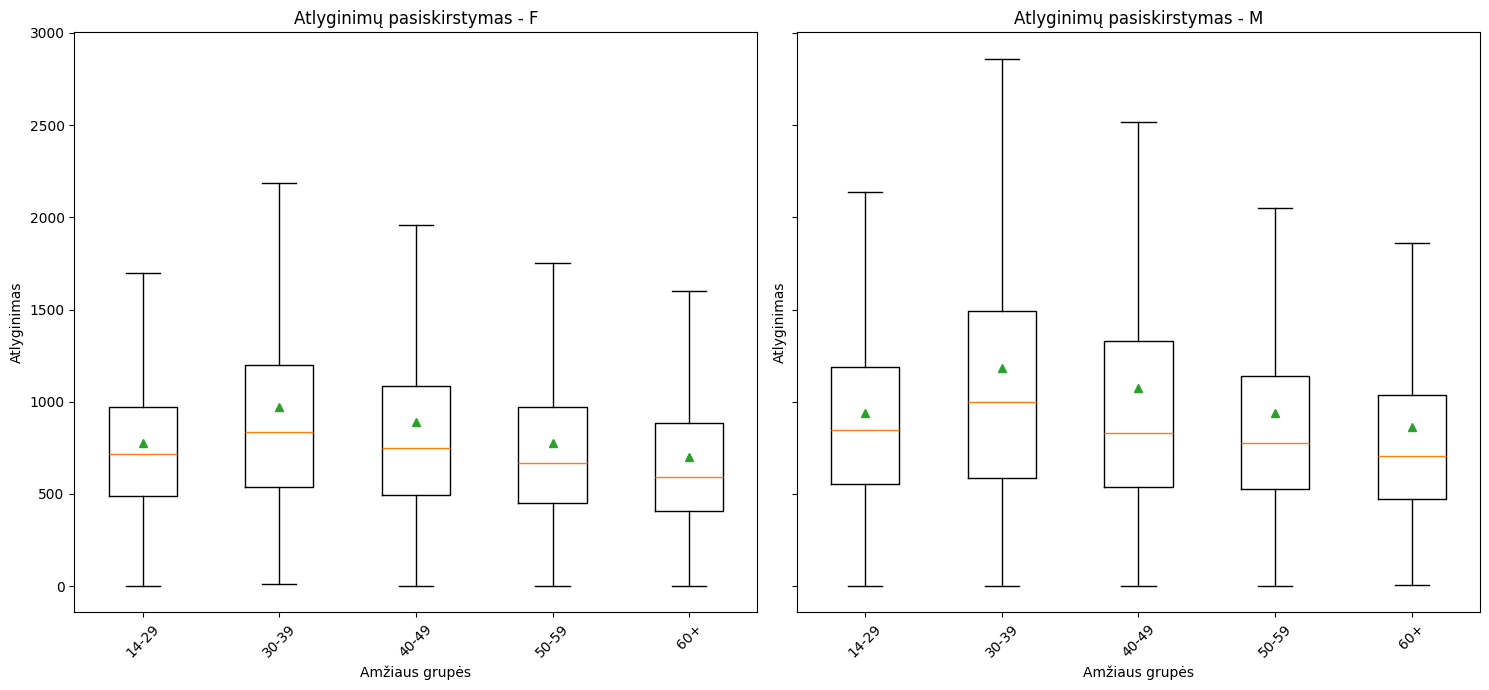

In [6]:
#parodykite su boxplot atlyginimų pasiskirstymus nuo amžiaus grupės 2018 metams (vyrams ir moterims atskirai).
sql = """
SELECT
    lytis, amzius, GROUP_CONCAT(bdu_spalio) AS GC
FROM DUS2018N 
GROUP BY amzius, lytis;
"""
C.execute(sql)
ans = C.fetchall()

# Duomenų apdorojimas
lytis, amzius, bdusp = list(map(list, zip(*ans)))

bduspII = []
for i in bdusp:
    skaiciai = np.fromstring(i, sep=',')
    bduspII.append(skaiciai)

# Unikalios amžiaus grupės ir lytis
amzius_grupes = sorted(set(amzius))
lytis_grupes = sorted(set(lytis))

# Boxplot:
fig, axes = plt.subplots(1, len(lytis_grupes), figsize=[15, 7], sharey=True)

# Kiekvienai lyčiai atskirai
for ax, lytys in zip(axes, lytis_grupes):
    duomenys = [bduspII[i] for i in range(len(amzius)) if lytis[i] == lytys]
    ax.boxplot(duomenys, showmeans=True, showfliers=False)
    ax.set_xticklabels(amzius_grupes, rotation=0)
    ax.set_title(f'Atlyginimų pasiskirstymas - {lytys}')
    ax.set_xlabel('Amžiaus grupės')
    ax.set_ylabel('Atlyginimas')

plt.tight_layout()
plt.show()

| 0 |       G1       |555,686,436,455,|
| 1 |       G2       |460,1487,1500,15|
| 2 |       G3       |511,915,975,1087|
| 3 |       G4       |1061,1072,1400,2|
[array([555., 686., 436., ..., 585., 933., 480.]), array([ 460., 1487., 1500., ...,  402.,  448.,  507.]), array([ 511.,  915.,  975., ..., 1953., 1990.,  462.]), array([1061., 1072., 1400., ...,  400.,  160., 3621.])]


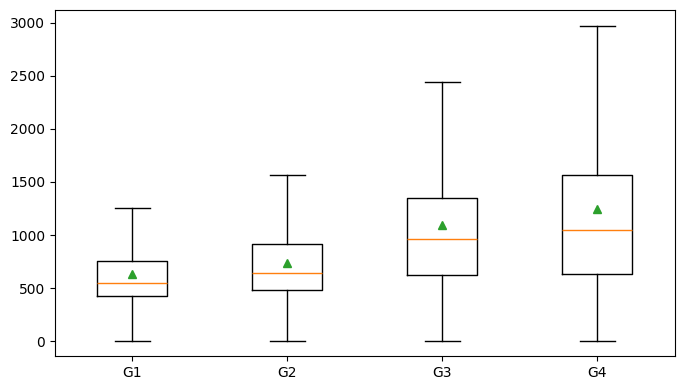

In [3]:
#Taip pat parodykite su boxplot'ais atlyginimų pasiskirstymus nuo išsilavinimo, 2018 metams (visiems respondentams)
sql="""SELECT
issilavinimas, GROUP_CONCAT(bdu_spalio) AS GC
FROM DUS2018N 
GROUP BY issilavinimas;"""
C.execute(sql)
ans = C.fetchall()
issilavinimas, bdusp = list(map(list, zip(*ans)))
#? = np.transpose(ans)
pout(ans)
bduspII = []
for i in bdusp:
    skaiciai = np.fromstring(i, sep=',')
    bduspII.append(skaiciai)
print(bduspII)# boxplot:
fig, axis = plt.subplots(figsize=[8,4.5])

axis.boxplot(bduspII, showmeans=True, showfliers=False)

axis.set_xticklabels(issilavinimas)

plt.show()

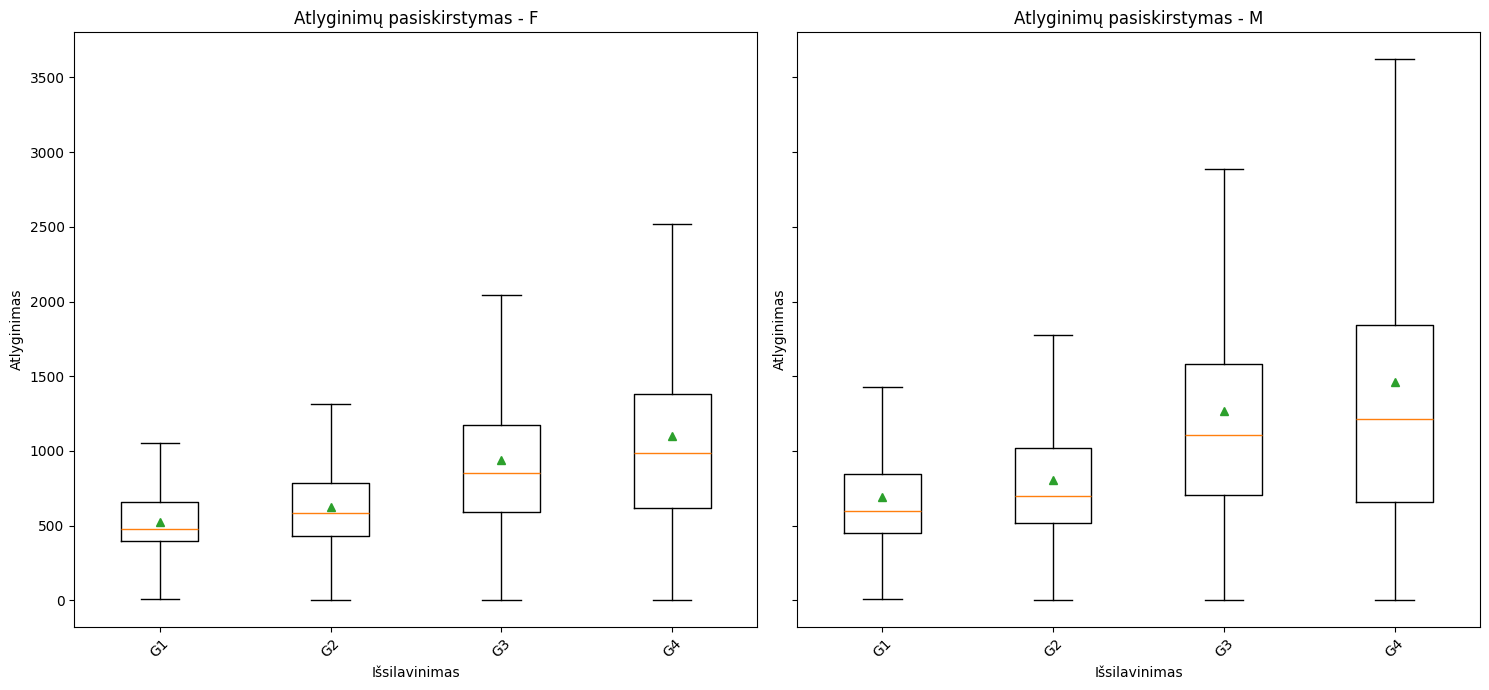

In [9]:
#Taip pat parodykite su boxplot'ais atlyginimų pasiskirstymus nuo išsilavinimo, 2018 metams (visiems respondentams), MOterims ir vyrams
sql = """
SELECT
    lytis, issilavinimas, GROUP_CONCAT(bdu_spalio) AS GC
FROM DUS2018N 
GROUP BY issilavinimas, lytis;
"""
C.execute(sql)
ans = C.fetchall()

# Duomenų apdorojimas
lytis, issilavinimas, bdusp = list(map(list, zip(*ans)))

bduspII = []
for i in bdusp:
    skaiciai = np.fromstring(i, sep=',')
    bduspII.append(skaiciai)

# Unikalios išsilavinimo grupės ir lytis
issilavinimas_grupes = sorted(set(issilavinimas), key=lambda x: issilavinimas.index(x))
lytis_grupes = sorted(set(lytis))

# Boxplot:
fig, axes = plt.subplots(1, len(lytis_grupes), figsize=[15, 7], sharey=True)

# Kiekvienai lyčiai atskirai
for ax, lytys in zip(axes, lytis_grupes):
    duomenys = [bduspII[i] for i in range(len(issilavinimas)) if lytis[i] == lytys]
    ax.boxplot(duomenys, showmeans=True, showfliers=False)
    ax.set_xticklabels(issilavinimas_grupes, rotation=45)
    ax.set_title(f'Atlyginimų pasiskirstymas - {lytys}')
    ax.set_xlabel('Išsilavinimas')
    ax.set_ylabel('Atlyginimas')

plt.tight_layout()
plt.show()

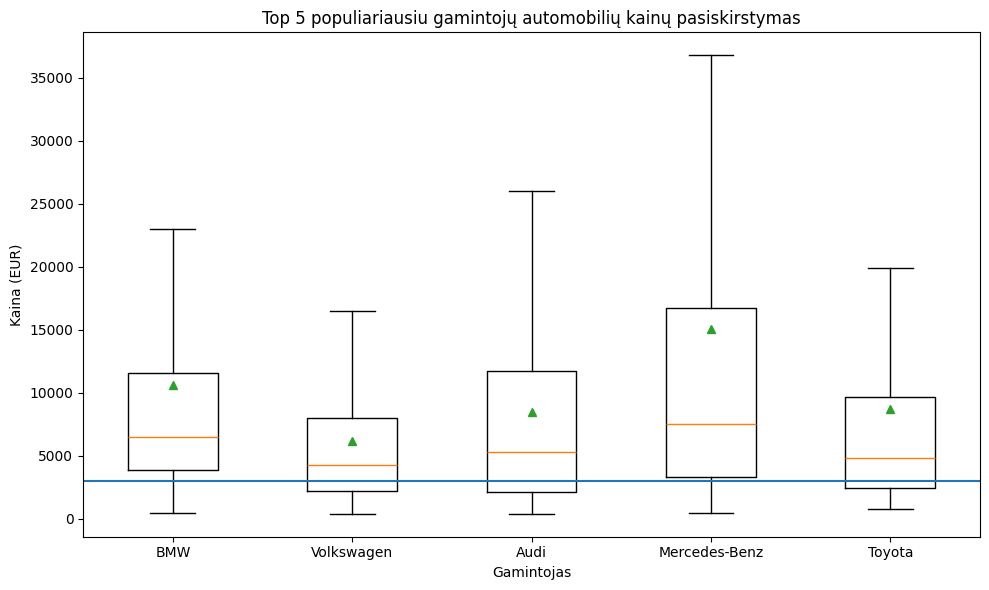

In [13]:
#Pateikite su boxplot'u  populiariausiu gamintoju kainų pasiskirtymą top 5 automobiliu
sql = """
SELECT
    gamintojas, GROUP_CONCAT(REPLACE(REPLACE(price, '€', ''), ' ', '')) AS GC
FROM autopliuslt 
GROUP BY gamintojas
ORDER BY Count(gamintojas) DESC
LIMIT 5;
"""
C.execute(sql)
ans = C.fetchall()

# Duomenų apdorojimas
gamintojas, price = list(map(list, zip(*ans)))

Gamintojai_Top = []
for i in price:
    skaiciai = np.fromstring(i, sep=',')
    Gamintojai_Top.append(skaiciai)

# Boxplot:
fig, axis = plt.subplots(figsize=[10, 6])

axis.boxplot(Gamintojai_Top, showmeans=True, showfliers=False)

axis.set_xticklabels(gamintojas, rotation=0)
axis.set_xlabel('Gamintojas')
axis.set_ylabel('Kaina (EUR)')
axis.set_title('Top 5 populiariausiu gamintojų automobilių kainų pasiskirstymas')
axis.axhline(y=3000)

plt.tight_layout()
plt.show()

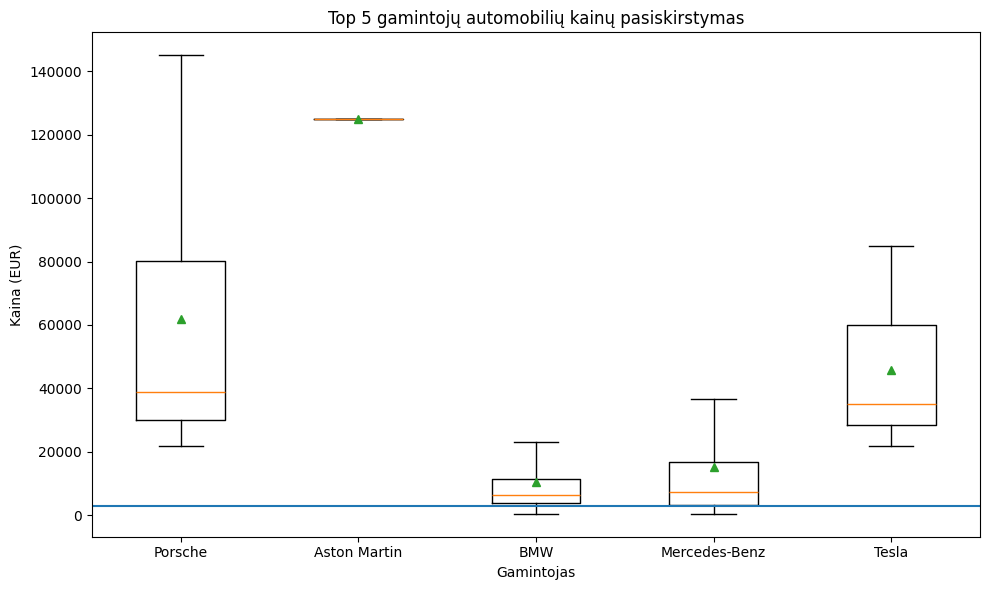

In [16]:
#Pateikite su boxplot'u 5 brangoiausiu gamintoju kainų pasiskirtymą top 1
sql = """
SELECT
    gamintojas, GROUP_CONCAT(REPLACE(REPLACE(price, '€', ''), ' ', '')) AS GC
FROM autopliuslt 
GROUP BY gamintojas
ORDER BY MAX(CAST(REPLACE(REPLACE(price, '€', ''), ' ', '') AS DECIMAL)) DESC
LIMIT 5;
"""
C.execute(sql)
ans = C.fetchall()

# Duomenų apdorojimas
gamintojas, price = list(map(list, zip(*ans)))

Gamintojai_Top = []
for i in price:
    skaiciai = np.fromstring(i, sep=',')
    Gamintojai_Top.append(skaiciai)

# Boxplot:
fig, axis = plt.subplots(figsize=[10, 6])

axis.boxplot(Gamintojai_Top, showmeans=True, showfliers=False)

axis.set_xticklabels(gamintojas, rotation=0)
axis.set_xlabel('Gamintojas')
axis.set_ylabel('Kaina (EUR)')
axis.set_title('Top 5 gamintojų automobilių kainų pasiskirstymas')
axis.axhline(y=3000)

plt.tight_layout()
plt.show()

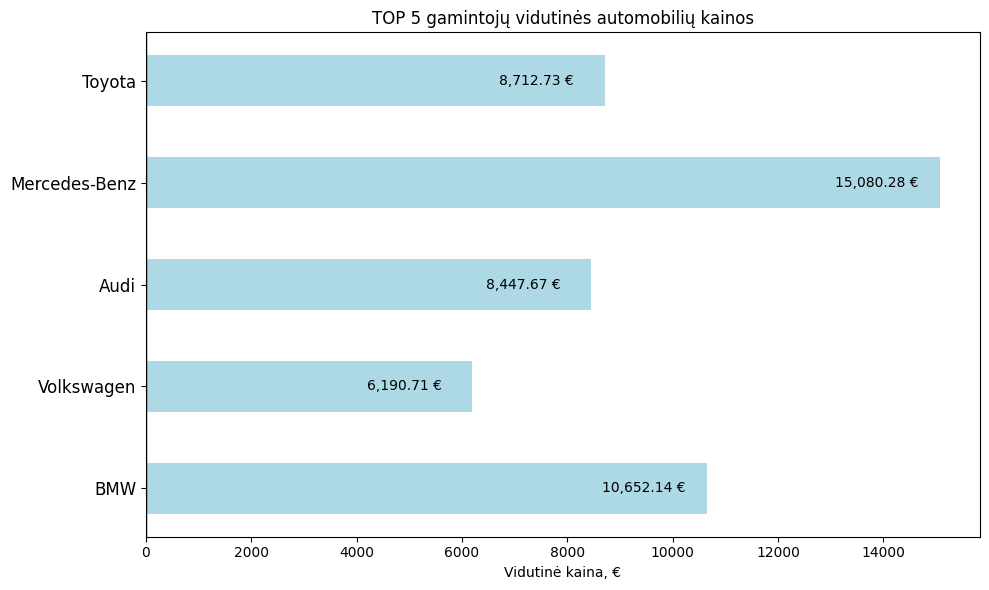

In [47]:
# pateikite su bar arba barh vidutines automobilių kainas
# top 5 gamintojams, dviem variantais:
# a) laikote, kad visi skelbimai yra unikalūs
sql = """
SELECT
    gamintojas, AVG(CAST(REPLACE(REPLACE(price, '€', ''), ' ', '') AS DECIMAL)) AS avg_price
FROM autopliuslt 
GROUP BY gamintojas
ORDER BY COUNT(gamintojas) DESC
LIMIT 5;
"""
C.execute(sql)
ans = C.fetchall()

# Duomenų paruošimas grafikui
avg_price = [row[1] for row in ans]
gamintojas = [row[0] for row in ans]

# Braižom grafika
plt.figure(figsize=(10, 6))
plt.barh(gamintojas, avg_price, color='lightblue', height=0.5)
plt.xlabel('Vidutinė kaina, €')
plt.title('TOP 5 gamintojų vidutinės automobilių kainos')
plt.yticks(fontsize=12)
plt.axvline(x=0, color='black', linewidth=1)

# Pridėti etiketes su vidutinėmis kainomis prie stulpelių
for i in range(len(avg_price)):
    plt.text(avg_price[i]-2000, 
             i, 
             f'{avg_price[i]:,.2f} €', 
             va='center', fontsize=10)

plt.tight_layout()
plt.show()

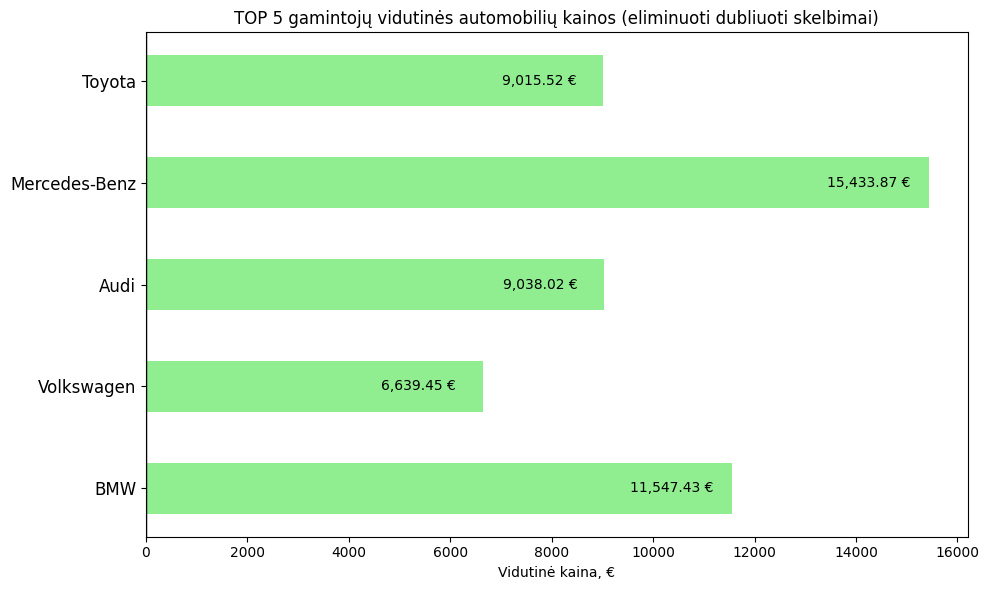

In [48]:
# pateikite su bar arba barh vidutines automobilių kainas
# top 5 gamintojams, eliminuojate pasikartojančius skelbimus (jei skelbimo id kartojasi DB įrašuose
# tai skelbimas nėra unikalus, jis dubliuojasi)
sql = """
WITH RankedAds AS (
    SELECT
        ID, 
        gamintojas, 
        CAST(REPLACE(REPLACE(price, '€', ''), ' ', '') AS DECIMAL) AS price,
        ROW_NUMBER() OVER(PARTITION BY ID ORDER BY ID) AS rn
    FROM 
        autopliuslt
    WHERE 
        ID IS NOT NULL
)
SELECT
    gamintojas, AVG(price) AS avg_price
FROM 
    RankedAds
WHERE
    rn = 1  
GROUP BY 
    gamintojas
ORDER BY 
    COUNT(gamintojas) DESC
LIMIT 5;
"""
C.execute(sql)
ans = C.fetchall()

# Duomenų paruošimas grafikui
avg_price = [row[1] for row in ans]
gamintojas = [row[0] for row in ans]

# Braižom grafika
plt.figure(figsize=(10, 6))
plt.barh(gamintojas, avg_price, color='lightgreen', height=0.5)
plt.xlabel('Vidutinė kaina, €')
plt.title('TOP 5 gamintojų vidutinės automobilių kainos (eliminuoti dubliuoti skelbimai)')
plt.yticks(fontsize=12)
plt.axvline(x=0, color='black', linewidth=1)

# Pridėti etiketes su vidutinėmis kainomis prie stulpelių
for i in range(len(avg_price)):
    plt.text(avg_price[i] - 2000, 
             i, 
             f'{avg_price[i]:,.2f} €', 
             va='center', fontsize=10)

plt.tight_layout()
plt.show()

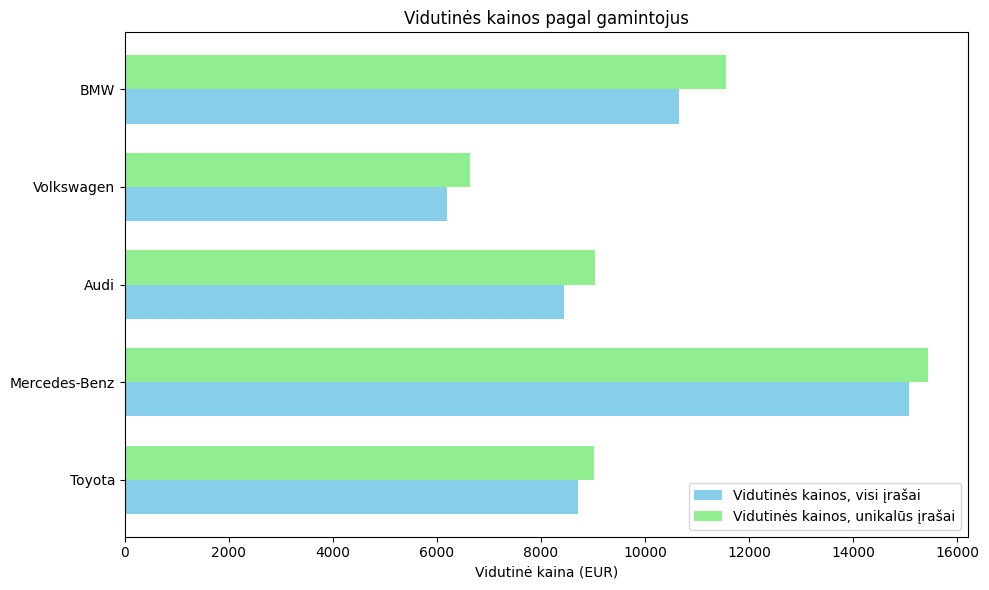

In [44]:


# Duomenys
gamintojai = ['Toyota', 'Mercedes-Benz', 'Audi', 'Volkswagen', 'BMW']
vidutines_kainos1 = [8712.73, 15080.28, 8447.67, 6190.71, 10652.14]
vidutines_kainos2 = [9015.52, 15433.87, 9038.02, 6639.45, 11547.43]

# Barų plotis
bar_width = 0.35

# Barų pozicijos kiekvienam gamintojui
r1 = np.arange(len(gamintojai))
r2 = [x + bar_width for x in r1]

# Sukuriame paveikslą
fig, ax = plt.subplots(figsize=(10, 6))

# Pirmasis barh grafikas
ax.barh(r1, vidutines_kainos1, color='skyblue', height=bar_width, label='Vidutinės kainos, visi įrašai')

# Antrasis barh grafikas
ax.barh(r2, vidutines_kainos2, color='lightgreen', height=bar_width, label='Vidutinės kainos, unikalūs įrašai')

# Pridėti etiketes ir pavadinimus
ax.set_xlabel('Vidutinė kaina (EUR)')
ax.set_yticks([r + bar_width/2 for r in range(len(gamintojai))])
ax.set_yticklabels(gamintojai)
ax.set_title('Vidutinės kainos pagal gamintojus')
ax.legend()
 

# Parodyti grafika
plt.tight_layout()
plt.show()

C:\Users\eleta\AppData\Local\Temp\ipykernel_35616\2476176357.py:16: DeprecationWarning: string or file could not be read to its end due to unmatched data; this will raise a ValueError in the future.
  skaiciai = np.fromstring(i, sep=',')


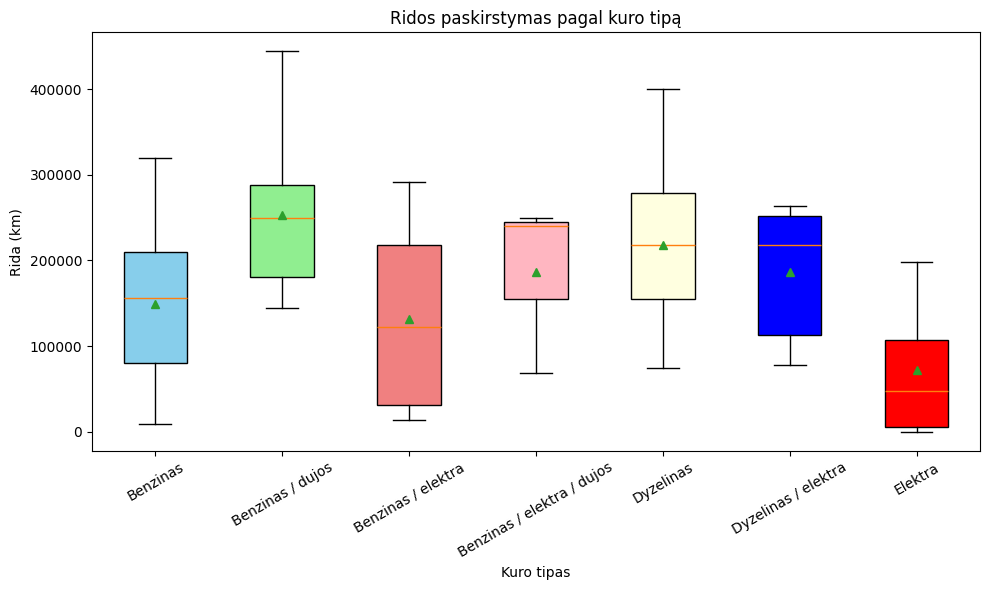

In [56]:
# atvaziduokite boxplotu ridos pasiskirstymą nuo kuro rūšies/tipo
sql = """
SELECT
    kuro_tipas, GROUP_CONCAT(REPLACE(REPLACE(rida, 'km', ''), ' ', '')) AS ridos
FROM autopliuslt 
GROUP BY kuro_tipas;
"""
C.execute(sql)
ans = C.fetchall()

# Duomenų apdorojimas
kuro_tipas, ridos = list(map(list, zip(*ans)))

kuras = []
for i in ridos:
    skaiciai = np.fromstring(i, sep=',')
    kuras.append(skaiciai)

# Sukuriame spalvų sąrašą
colors = ['skyblue', 'lightgreen', 'lightcoral', 'lightpink', 'lightyellow','blue', 'red']

# Boxplot:
fig, axis = plt.subplots(figsize=[10, 6])

box = axis.boxplot(kuras, patch_artist=True, showmeans=True, showfliers=False)

# Nudazome kiekviena box kita spalva
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# Nustatome etiketes ir pavadinimus
axis.set_xticklabels(kuro_tipas, rotation=30)
axis.set_xlabel('Kuro tipas')
axis.set_ylabel('Rida (km)')
axis.set_title('Ridos paskirstymas pagal kuro tipą')

plt.tight_layout()
plt.show()

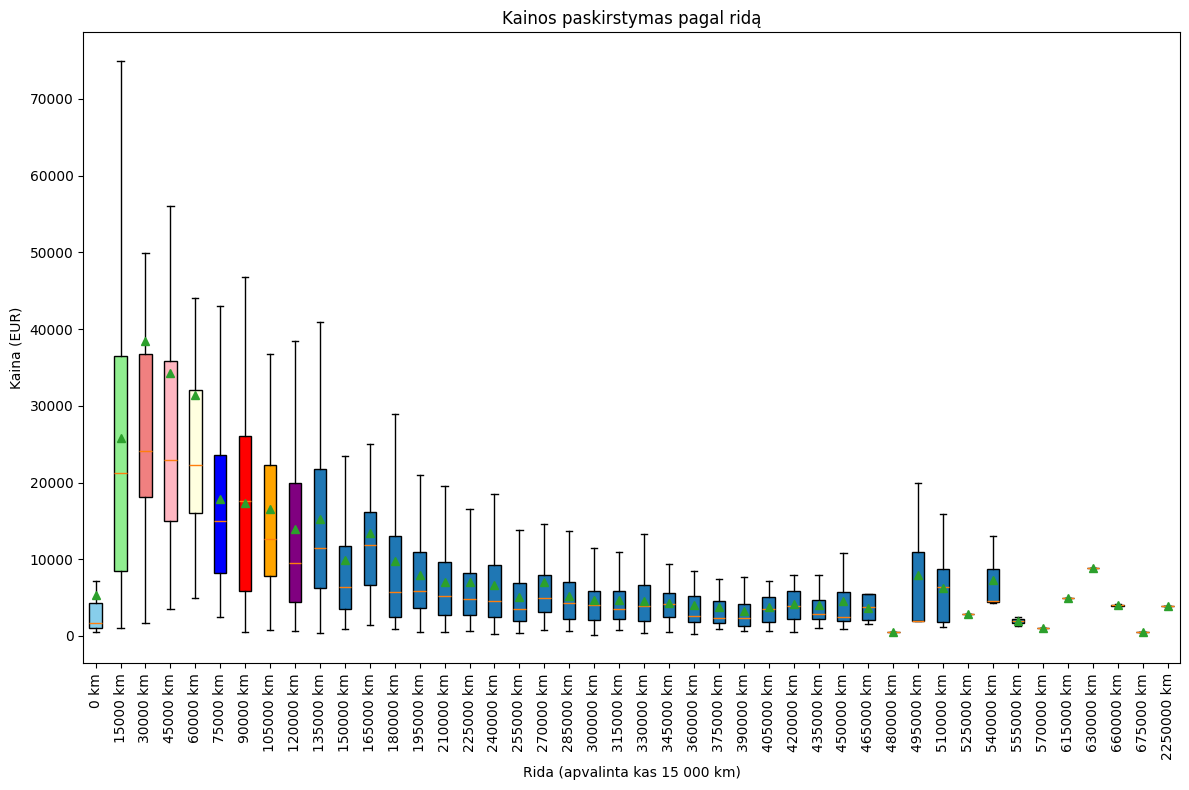

In [63]:
# atvaizduokite boxplotais kainos pasiskirstymą nuo ridos (15 000 km intervalais apvalintos)
sql = """
SELECT
    CEIL(CAST(REPLACE(REPLACE(rida, 'km', ''), ' ', '') AS UNSIGNED) / 15000) * 15000 AS ridos,
    CAST(REPLACE(REPLACE(price, '€', ''), ' ', '') AS UNSIGNED) AS price
FROM autopliuslt;
"""
C.execute(sql)
ans = C.fetchall()

# Duomenų apdorojimas - grupuojame kainas pagal ridos intervalus
from collections import defaultdict

kainos_grupes = defaultdict(list)
for rida, kaina in ans:
    kainos_grupes[rida].append(kaina)

# Paruošiame duomenis boxplotui
ridos_intervalas = sorted(kainos_grupes.keys())
kainu_sarasas = [kainos_grupes[rida] for rida in ridos_intervalas]

# Sukuriame spalvų sąrašą (turėtų būti tiek spalvų, kiek ridos intervalų)
colors = ['skyblue', 'lightgreen', 'lightcoral', 'lightpink', 'lightyellow', 'blue', 'red', 'orange', 'purple']

# Boxplot:
fig, axis = plt.subplots(figsize=[12, 8])

box = axis.boxplot(kainu_sarasas, patch_artist=True, showmeans=True, showfliers=False)

# Nudazome kiekviena box kita spalva
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# Nustatome etiketes ir pavadinimus
axis.set_xticklabels([f'{int(r)} km' for r in ridos_intervalas], rotation=90)
axis.set_xlabel('Rida (apvalinta kas 15 000 km)')
axis.set_ylabel('Kaina (EUR)')
axis.set_title('Kainos paskirstymas pagal ridą')

plt.tight_layout()
plt.show()

C:\Users\eleta\AppData\Local\Temp\ipykernel_35616\1914811556.py:17: DeprecationWarning: string or file could not be read to its end due to unmatched data; this will raise a ValueError in the future.
  skaiciai = np.fromstring(i, sep=',')


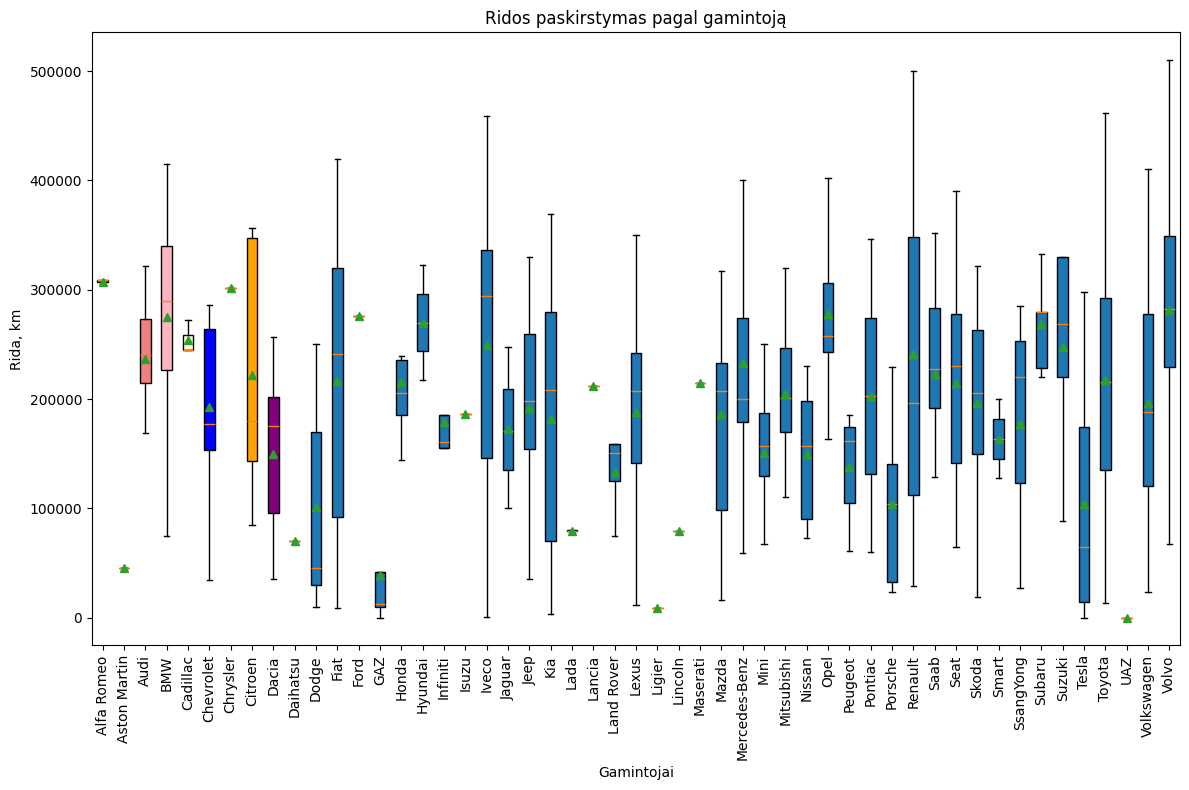

In [74]:
# atvaizduokite boxplotais ridos pasiskirstymo priklausomybę nuo gamintojo
sql = """
SELECT
    gamintojas,
    GROUP_CONCAT(REPLACE(REPLACE(rida, 'km', ''), ' ', '')) AS ridos
FROM autopliuslt
GROUP BY gamintojas;
"""
C.execute(sql)
ans = C.fetchall()

# Duomenų apdorojimas
gamintojai, ridos = list(map(list, zip(*ans)))

Gamintojai = []
for i in ridos:
    skaiciai = np.fromstring(i, sep=',')
    Gamintojai.append(skaiciai)

# Sukuriame spalvų sąrašą (turėtų būti tiek spalvų, kiek gamintojų)
colors = ['skyblue', 'lightgreen', 'lightcoral', 'lightpink', 'lightyellow', 'blue', 'red', 'orange', 'purple']

# Boxplot:
fig, axis = plt.subplots(figsize=[12, 8])

box = axis.boxplot(Gamintojai, patch_artist=True, showmeans=True, showfliers=False)

# Nudazome kiekviena box kita spalva
for patch, color in zip(box['boxes'], colors[:len(Gamintojai)]):
    patch.set_facecolor(color)

# Nustatome etiketes ir pavadinimus
axis.set_xticklabels(gamintojai, rotation=90)
axis.set_xlabel('Gamintojai')
axis.set_ylabel('Rida, km')
axis.set_title('Ridos paskirstymas pagal gamintoją')

plt.tight_layout()
plt.show()


C:\Users\eleta\AppData\Local\Temp\ipykernel_35616\1058831820.py:24: DeprecationWarning: string or file could not be read to its end due to unmatched data; this will raise a ValueError in the future.
  skaiciai = np.fromstring(i, sep=',')
C:\Users\eleta\AppData\Local\Temp\ipykernel_35616\1058831820.py:28: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("tab20c")  # Naudojame cm.get_cmap iš matplotlib.cm


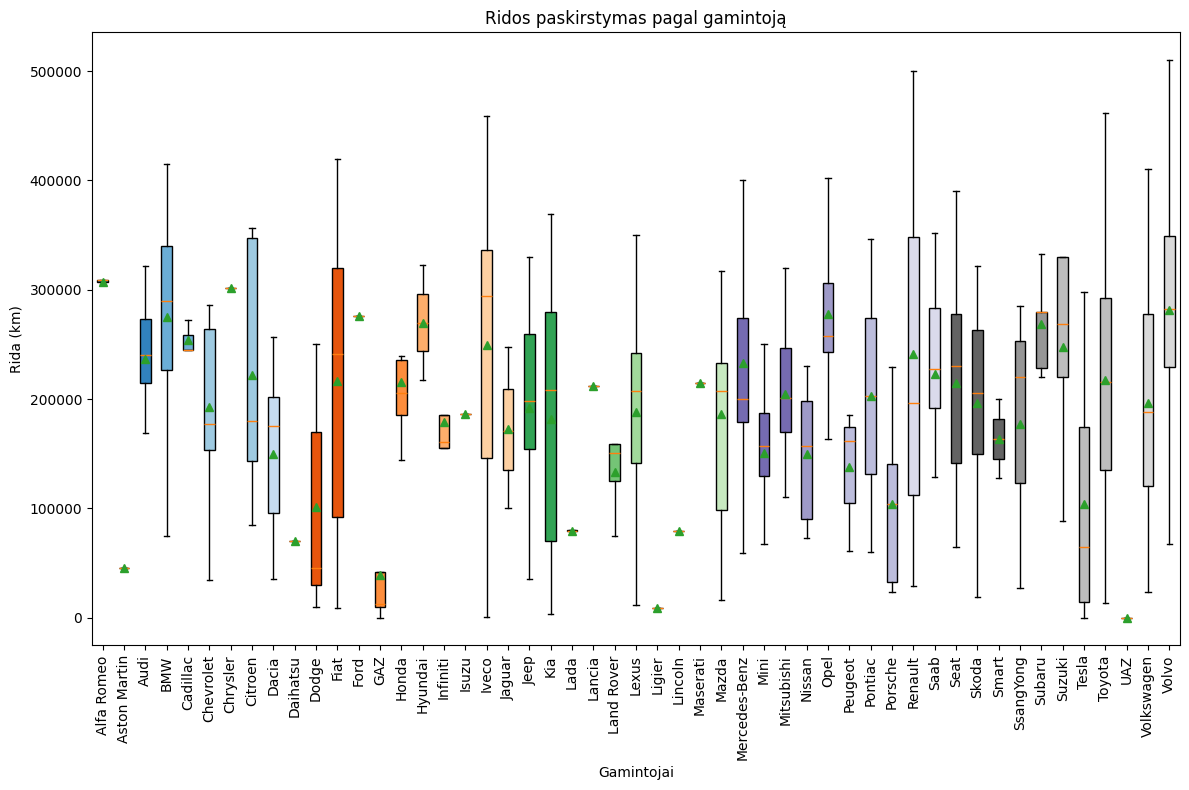

In [79]:
# atvaizduokite boxplotais ridos pasiskirstymo priklausomybę nuo gamintojo
#Kiekveina box nudazau vis kita spalva, nenurodydama spalvu,kurius skaicius turi buti box skaicius.

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm  # Importuojame cm modulį, kuriame yra get_cmap funkcija

# SQL užklausa su grupavimu pagal gamintoją
sql = """
SELECT
    gamintojas,
    GROUP_CONCAT(REPLACE(REPLACE(rida, 'km', ''), ' ', '')) AS ridos
FROM autopliuslt
GROUP BY gamintojas;
"""
C.execute(sql)
ans = C.fetchall()

# Duomenų apdorojimas
gamintojai, ridos = list(map(list, zip(*ans)))

Gamintojai = []
for i in ridos:
    skaiciai = np.fromstring(i, sep=',')
    Gamintojai.append(skaiciai)

# Sukuriame spalvų žemėlapį, kad būtų tiek atspalvių, kiek yra dėžučių
cmap = cm.get_cmap("tab20c")  # Naudojame cm.get_cmap iš matplotlib.cm
colors = [cmap(i) for i in np.linspace(0, 1, len(Gamintojai))]

# Boxplot:
fig, axis = plt.subplots(figsize=[12, 8])

box = axis.boxplot(Gamintojai, patch_artist=True, showmeans=True, showfliers=False)

# Nudazome kiekviena box kita spalva
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# Nustatome etiketes ir pavadinimus
axis.set_xticklabels(gamintojai, rotation=90)
axis.set_xlabel('Gamintojai')
axis.set_ylabel('Rida (km)')
axis.set_title('Ridos paskirstymas pagal gamintoją')

plt.tight_layout()
plt.show()

C:\Users\eleta\AppData\Local\Temp\ipykernel_34836\1403569536.py:50: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("tab20c")


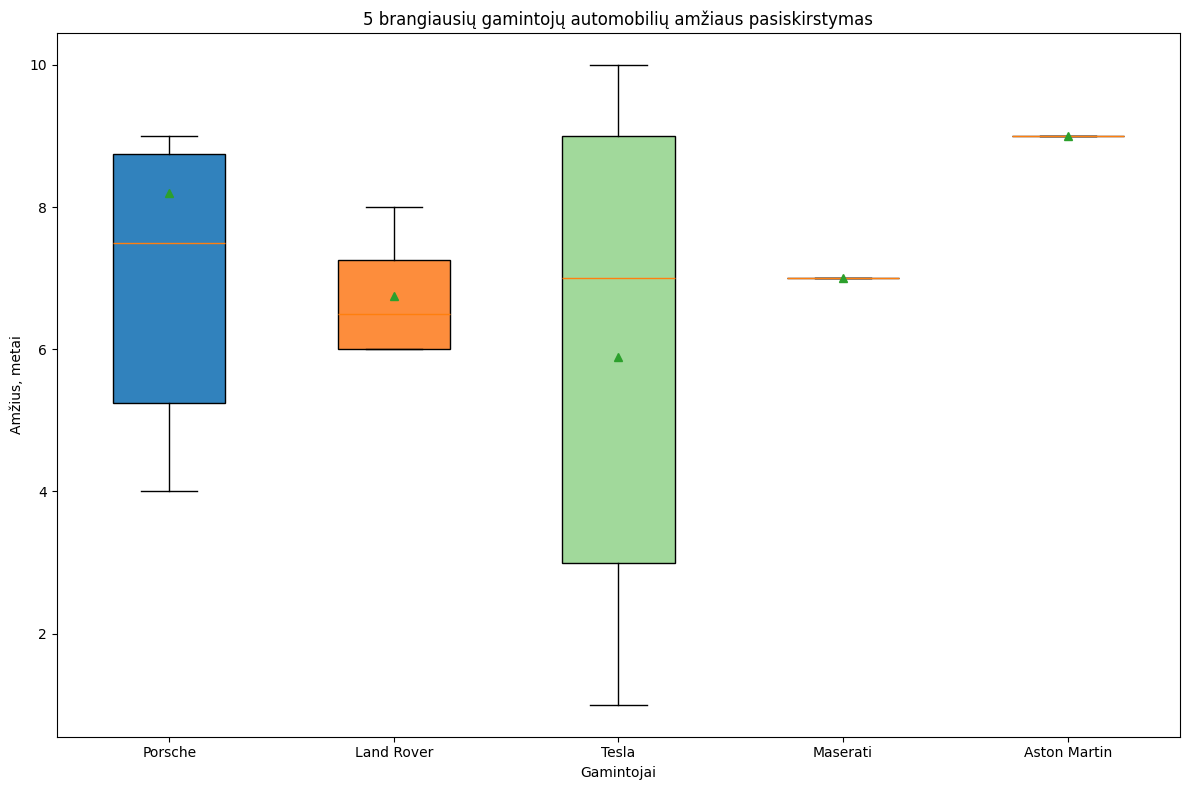

In [7]:
#suraskite visus gamintojus, kurių  modelių vidutinė kaina yra didesnė už vidutinę6 visų automobilių
# kainą.
# Iš jų atrinkite 5-kis brangiausius gamintojus, ir suraskite jų  parduodamų modelių vidutinį amžių.
# taip pat atvaizduokite su boxplot'ais šių 5-kių gamintojų parduodamų modelių kainų pasiskirstymą.
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

sql = """
WITH gamintojai_amzius AS (
    SELECT
        gamintojas,
        ROUND(2024 - CAST(LEFT(pagaminimo_data, 4) AS INT), 2) AS amzius,
        CAST(REPLACE(price, ' ', '') AS DECIMAL) AS price
    FROM autopliuslt
),
top_gamintojai AS (
    SELECT gamintojas
    FROM gamintojai_amzius
    GROUP BY gamintojas
    HAVING AVG(price) > (
        SELECT AVG(CAST(REPLACE(price, ' ', '') AS DECIMAL))
        FROM autopliuslt
    )
    ORDER BY AVG(price) DESC
    LIMIT 5
)

SELECT
    a.gamintojas,
    ROUND(2024 - CAST(LEFT(a.pagaminimo_data, 4) AS INT), 2) AS amzius
FROM
    autopliuslt a
JOIN
    top_gamintojai g ON a.gamintojas = g.gamintojas;
"""

C.execute(sql)
ans = C.fetchall()

# Duomenų apdorojimas. Formato  skaiciai = np.fromstring(i, sep=',') jau negaliu naudoti, nes amzius pateiktas skaiciais. 333333333

gamintojai_amzius = {}
for row in ans:
    gamintojas, amzius = row[0], float(row[1])
    if gamintojas not in gamintojai_amzius:
        gamintojai_amzius[gamintojas] = []
    gamintojai_amzius[gamintojas].append(amzius)

# Sukuriame spalvų žemėlapį, kad būtų tiek atspalvių, kiek yra dėžučių
cmap = cm.get_cmap("tab20c")
colors = [cmap(i) for i in np.linspace(0, 1, len(gamintojai_amzius))]

# Boxplot:
fig, axis = plt.subplots(figsize=[12, 8])

box = axis.boxplot(gamintojai_amzius.values(), patch_artist=True, showmeans=True, showfliers=False)

# Nudazome kiekviena box kita spalva
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# Nustatome etiketes ir pavadinimus
axis.set_xticklabels(gamintojai_amzius.keys(), rotation=0)
axis.set_xlabel('Gamintojai')
axis.set_ylabel('Amžius, metai')
axis.set_title('5 brangiausių gamintojų automobilių amžiaus pasiskirstymas')

plt.tight_layout()
plt.show()